In [1]:
import numpy as np
import pandas as pd

# グラフ描画
from matplotlib import pylab as plt

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
import tensorflow as tf

In [43]:
df = pd.read_csv('USD_JPY_M1_20210120_20210204.csv')

In [47]:
def make_dataset(data_arr, window_size):

    data, target = [], []

    for i in range(len(data_arr)-window_size):
        data.append(data_arr[i:i + window_size])
        target.append(data_arr[i + window_size])

    re_data = np.array(data).reshape(len(data), window_size, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target

In [90]:
window = 20
data_length = 5000

max_close =  df['C'].values[-data_length:].max()

close_adj = df['C'].values[-data_length:] /max_close

x, y = make_dataset(close_adj, window)

In [92]:
val_size = 100
test_size = 100


x_train =  x[:-test_size][:-val_size]
x_val =  x[:-test_size][-val_size:]
x_test = x[-test_size:]

y_train =  y[:-test_size][:-val_size]
y_val =  y[:-test_size][-val_size:]
y_test = y[-test_size:]

In [117]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(200, activation='relu', input_shape=(None, 1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.MeanSquaredError())



In [118]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 200)               161600    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [119]:
batch_size = 20
n_epoch = 50

# 学習
hist = model.fit(x_train, y_train,
                 epochs=n_epoch,
                 validation_data=(x_val, y_val),
                 verbose=1,
                 batch_size=batch_size)

Epoch 1/50
239/239 [==============================] - 5s 16ms/step - loss: 0.0956 - val_loss: 6.2618e-08
Epoch 2/50
239/239 [==============================] - 4s 15ms/step - loss: 2.8254e-08 - val_loss: 1.1664e-07
Epoch 3/50
239/239 [==============================] - 4s 15ms/step - loss: 2.8359e-08 - val_loss: 8.2254e-08
Epoch 4/50
239/239 [==============================] - 4s 15ms/step - loss: 2.9605e-08 - val_loss: 6.9786e-08
Epoch 5/50
239/239 [==============================] - 4s 15ms/step - loss: 3.6531e-08 - val_loss: 6.5426e-08
Epoch 6/50
239/239 [==============================] - 4s 15ms/step - loss: 3.2427e-08 - val_loss: 7.6939e-08
Epoch 7/50
239/239 [==============================] - 4s 15ms/step - loss: 3.6490e-08 - val_loss: 9.9951e-08
Epoch 8/50
239/239 [==============================] - 4s 15ms/step - loss: 3.3429e-08 - val_loss: 7.4781e-08
Epoch 9/50
239/239 [==============================] - 4s 15ms/step - loss: 3.9299e-08 - val_loss: 8.4104e-08
Epoch 10/50
239/239 [==

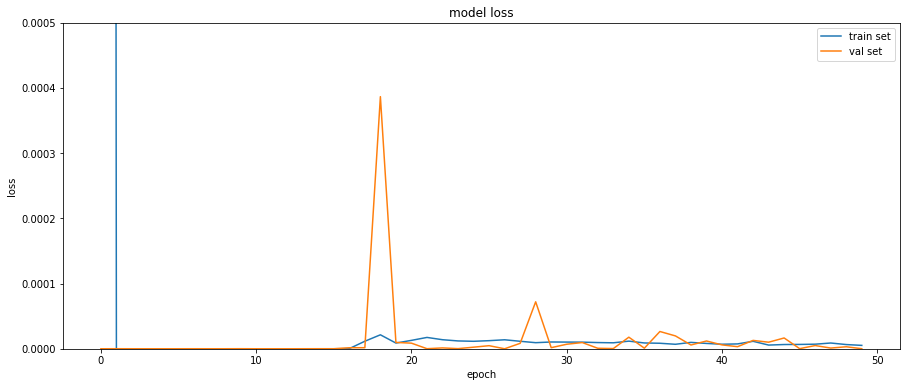

In [126]:
plt.plot(hist.history['loss'],label="train set")
plt.plot(hist.history['val_loss'],label="val set")
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(0, 0.0005)
plt.legend()
plt.show()

In [121]:
y_pred = model.predict(x_test)
y_stack = np.vstack([y_train, y_val, y_pred])

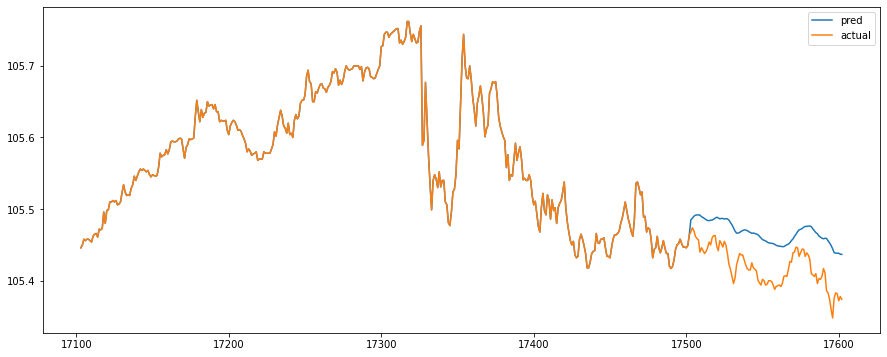

In [122]:
pd.Series(y_stack[:, 0] * max_close, index=df[-data_length+window:].index)[-500:].plot(label='pred')
df[-data_length+window:]['C'][-500:].plot(label='actual')
plt.legend()
plt.show()